<a href="https://colab.research.google.com/github/AeMcRa/Datascience-things/blob/main/Copy_of_Unit8ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 8 Exercises: The Art of BART

These exercises are grouped into two parts:

- Questions on the nature of decision trees, random forests, and BART models
- An oppurtunity to practice implementing and analyzing a BART model.

Enjoy!

## Bartian Theory

**Task1**:

Draw a decision tree--on a physical piece of paper--that predicts how much time you'll spend studying on a given day, using the amount of sleep you got the night before as a predictor.

If this seems to easy, then add another variable or two (test tomorrow? activity after school?), and/or increase the depth of your tree.

You do not have to show me or turn in your tree to earn credit for this question, although I would like to see your drawing.

**Task2**:

What is a decision tree? How do they work?

A decision tree is a flow-chart type structure that indicates an certain output depending on various catagorical and continuous inputs. They work by you/a computer or smthn looking at the various nodes, then doing the logic with the input indicated by the node, then determining which output it refers to. Just put the inputs in the tree lil bro

**Task3**:

What does the "depth" of a decision tree mean?

How do I know if a tree is too deep, or not deep enough?

The depth refers to distance to the bottommost leaf node from the root node.

**Task4:**

How are BART models similar and different from a decision tree?

Bart models also are based in trees, however BART uses random trees that impact each other to get a self-correcting forest.

**Task5**:

Why would we use a BART model instead of a decision tree?

BART self-corrects, which helps prevent over/underfitting. It is also sorta like a GP which we know is pretty good at modeling things.

## Bartian Penguins

**Task6**:

Create a BART model that uses flipper length, bill depth, and bill length to predict body mass in penguins, and make a ppc to check its fit

Code for loading the data is below. You'll need to do everything else yourself.

Remember to use my notes as a reference, and to copy and paste from them when it makes sense to.

Oh, and try a normal likelihood.

In [20]:
#!pip install pymc-bart
!pip install preliz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.1/519.1 kB 7.9 MB/s eta 0:00:00


In [21]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
import preliz as pz
import seaborn as sns

In [22]:
!pip install pymc-bart

In [23]:
#drop the incomplete rows from the data
url="https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/penguins.csv"
penguins = pd.read_csv(url).dropna()

(array([14., 42., 69., 52., 41., 39., 27., 27., 16.,  6.]),
 array([2.7 , 3.06, 3.42, 3.78, 4.14, 4.5 , 4.86, 5.22, 5.58, 5.94, 6.3 ]),
 <BarContainer object of 10 artists>)

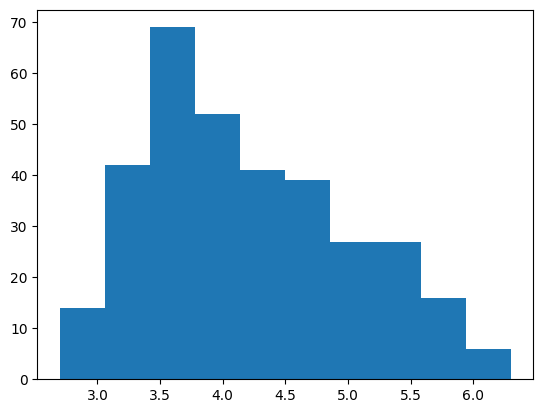

In [24]:
plt.hist(penguins.body_mass, bins = 10)

In [25]:
X = penguins[[
    "flipper_length",
    "bill_depth",
    "bill_length",
    ]]#.to_numpy()
Y = penguins["body_mass"].to_numpy()

In [26]:
with pm.Model() as model_penguins:
    s = pm.HalfNormal('s',1000)
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50)
    μ = pm.Deterministic("μ",pm.math.exp(μ_))
    y = pm.Gamma("y", mu=μ, sigma=s,  observed=Y)
    idata_penguins = pm.sample(compute_convergence_checks=False)

Output()

In [27]:
pm.sample_posterior_predictive(idata_penguins,model_penguins, extend_inferencedata=True)

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

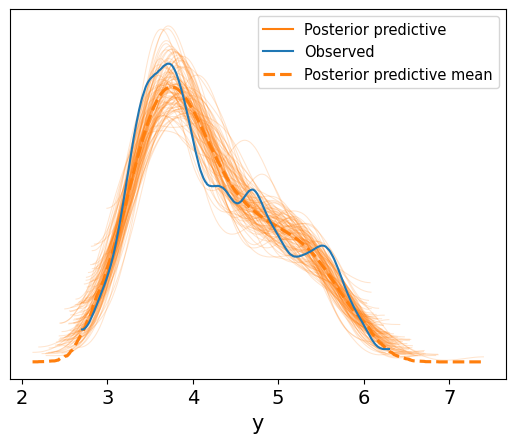

In [28]:
ax = az.plot_ppc(idata_penguins, num_pp_samples=100, colors=["C1", "C0", "C1"])

**Task7**:

Plot flipper length versus body mass,

and then plot the posterior predictve from the model over the data.
You're going to copy paste the plotting code from the notes, fyi.

In [29]:
posterior_mean = idata_penguins.posterior["μ"]

μ_hdi = az.hdi(ary=idata_penguins, group="posterior", var_names=["μ"], hdi_prob=0.74)

pps = az.extract(
    idata_penguins, group="posterior_predictive", var_names=["y"]
).T

In [30]:
X

,flipper_length,bill_depth,bill_length
0,18.1,1.87,3.91
1,18.6,1.74,3.95
2,19.5,1.80,4.03
4,19.3,1.93,3.67
5,19.0,2.06,3.93
...,...,...,...
339,20.7,1.98,5.58
340,20.2,1.81,4.35
341,19.3,1.82,4.96
342,21.0,1.90,5.08


/usr/local/lib/python3.11/dist-packages/arviz/plots/hdiplot.py:166: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


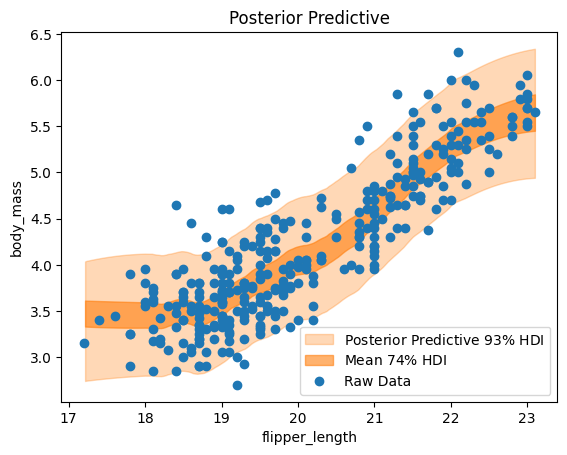

In [33]:
idx = np.argsort(X.flipper_length)
fig, ax = plt.subplots()

az.plot_hdi(
    x=X.flipper_length,
    y=pps,
    ax=ax,
    hdi_prob=0.93,
    fill_kwargs={"alpha": 0.3, "label": r"Posterior Predictive $93\%$ HDI"},
)

az.plot_hdi(
    x=X.flipper_length,
    y=posterior_mean,
    ax=ax,
    hdi_prob=0.74,
    fill_kwargs={"alpha": 0.6, "label": r"Mean $74\%$ HDI"},
)
ax.plot(penguins["flipper_length"], penguins["body_mass"], "o", c="C0", label="Raw Data")
ax.legend(loc="lower right")
ax.set(
    title="Posterior Predictive",
    xlabel="flipper_length",
    ylabel="body_mass",
);

**Task8**:

Interpret the plot above in context. Do you think it captures the true association between flipper length and body mass in penguins? Why or why not? Make sure to reference specific things you see in the plot.

I think it does a decent job. It makes sense that fat penguins have big flippers, but it does do the flattened end thing that probably isnt accurate to actual penguins.

**Task9**:

Create partial depnedence plots (pdps), individual conditional expectation (ice) plots, and a variable importance plot for the BARTpenguin model.

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='bill_length'>], dtype=object)

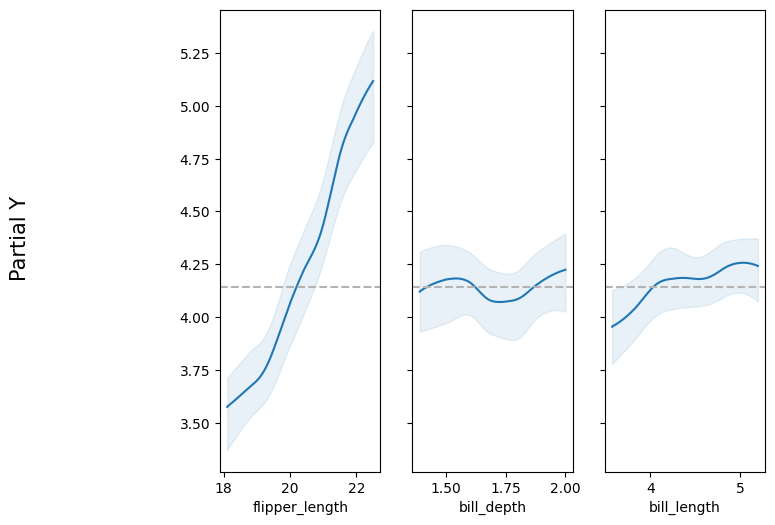

In [34]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='bill_length'>], dtype=object)

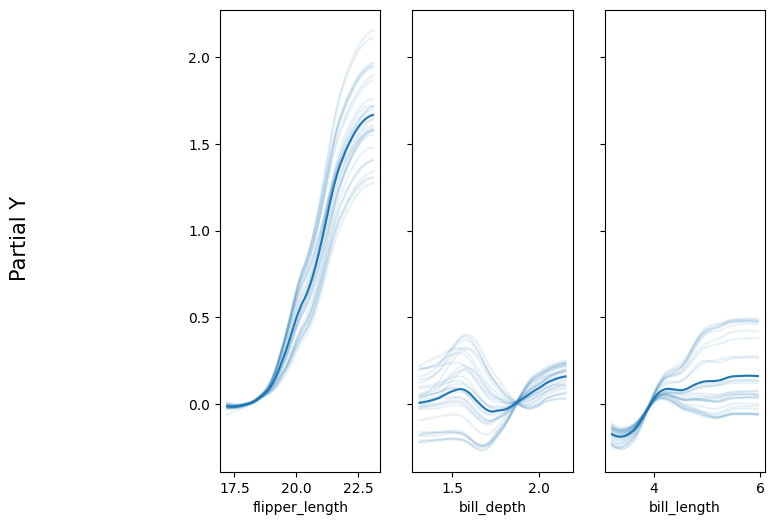

In [35]:
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

In [36]:
vi_penguins = pmb.compute_variable_importance(idata_penguins, μ_, X)

<Axes: ylabel='R²'>

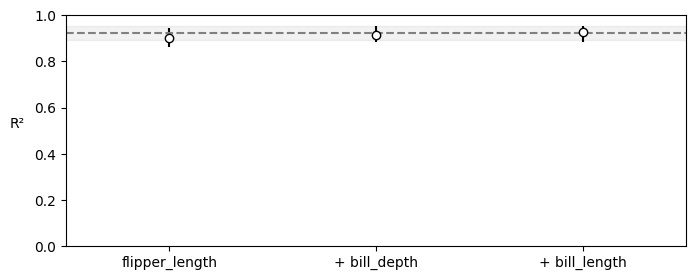

In [37]:
pmb.plot_variable_importance(vi_penguins)

**Task10**:

Using the above plots, make an argument about which variable(s) is/are most important in predicting body mass in penguins.

What is the relationship for each variable to body mass, when you take the other variables into account?

Is that relationship complicated by interactions between variables? How do you know?

Make sure to reference specific things you see in each plot, to justify your decisions and comments.

It seems like all of the variables are pretty good at predicting body mass. Bill length and depth seem relatively proportional, as, upon looking at pictures, it seems that most of the penguin species have similar bill shapes. Flipper length is probably more independant from the other variables, so it may complicate things when it interacts with the bill variables. We see that it is the least predictive of the three, but that isnt *really* saying much